In [1]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results'
ctgr = [f[6:-11] for f in os.listdir(resDir) if '.pkl' in f]
# ctgr = os.listdir(resDir)
# genelist = ['HMGCS1', 'TOP2A', 'DNAJB1', 'PCNA', 'HMOX1']
celllist = ['MCF7', 'A549', 'PC3']
steplist = [5]


In [3]:
ctgr

['KCenterGreedy',
 'KMeansSampling',
 'BadgeSampling',
 'LeastConfidence',
 'MarginSampling',
 'BALDDropout']

## Deliver the averaged F1 comparison of different step size and query strategies.

In [32]:
dictData = {key:{} for key in ctgr}
for q in ctgr:
    # print(q)
    dictQ = dictData[q]
    for s in steplist:
        # print(s)
        dictQ[s] = []
        mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/LINCS_{q}_{s}_0_30.pkl'
        # print(mtcPath)
        try:
            with open(mtcPath, 'rb') as f:
                all_acc,all_f1 = pickle.load(f)
        except:
            # print('wrong')
            continue
        # print(all_f1[0].shape)
        # print(all_f1[0])
        all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
        # extract the last cycle f1
        all_f1 = np.array(all_f1)[:, -1, :]
        # print(all_f1.shape)
        # print(all_f1)
        # average of cell lines
        f1 = np.mean(all_f1, axis=1)
        print(f"{q}-{s}: Mean: {f1.mean():.3f}, Std: {all_f1.std():.3f}")
        dictQ[s].append(f1)
    print(np.array(dictQ[s]))
    tmp = np.mean(np.array(dictQ[s]), axis=0)
    print(tmp)
    dictQ[s] = (round(tmp.mean(),3), round(tmp.std(),3))

KCenterGreedy-5: Mean: 0.480, Std: 0.026
[[0.4823321  0.4787228  0.47933409]]
[0.4823321  0.4787228  0.47933409]
KMeansSampling-5: Mean: 0.498, Std: 0.014
[[0.49648904 0.49890942 0.49977968]]
[0.49648904 0.49890942 0.49977968]
BadgeSampling-5: Mean: 0.482, Std: 0.028
[[0.47545186 0.48249677 0.48717644]]
[0.47545186 0.48249677 0.48717644]
LeastConfidence-5: Mean: 0.497, Std: 0.025
[[0.49776619 0.49721306 0.49620222]]
[0.49776619 0.49721306 0.49620222]
MarginSampling-5: Mean: 0.499, Std: 0.023
[[0.4991105  0.49997587 0.49833377]]
[0.4991105  0.49997587 0.49833377]
BALDDropout-5: Mean: 0.492, Std: 0.017
[[0.48715169 0.49355372 0.4960758 ]]
[0.48715169 0.49355372 0.4960758 ]


In [33]:
print(dictData)
pd.DataFrame.from_dict(dictData)

{'KCenterGreedy': {5: (0.48, 0.002)}, 'KMeansSampling': {5: (0.498, 0.001)}, 'BadgeSampling': {5: (0.482, 0.005)}, 'LeastConfidence': {5: (0.497, 0.001)}, 'MarginSampling': {5: (0.499, 0.001)}, 'BALDDropout': {5: (0.492, 0.004)}}


,KCenterGreedy,KMeansSampling,BadgeSampling,LeastConfidence,MarginSampling,BALDDropout
5,"(0.48, 0.002)","(0.498, 0.001)","(0.482, 0.005)","(0.497, 0.001)","(0.499, 0.001)","(0.492, 0.004)"


In [9]:
data=[]
for q in ctgr:
    # print(q)
    for s in steplist:
        # print(s)
        dictQ[s] = []
        mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/LINCS_{q}_{s}_0_30.pkl'
        try:
            with open(mtcPath, 'rb') as f:
                all_acc,all_f1 = pickle.load(f)
        except:
            continue
        all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
        # extract the last cycle f1
        all_f1 = np.array(all_f1)[:, -1, :]
        # average of randoms
        f1 = np.mean(all_f1, axis=0)
        data.append(f1)
        print(q,f1)
print(np.array(data))

KCenterGreedy [0.44819983 0.51196518 0.48022398]
KMeansSampling [0.48110818 0.51576228 0.49830769]
BadgeSampling [0.45267173 0.51571492 0.47673842]
LeastConfidence [0.46811805 0.52943433 0.4936291 ]
MarginSampling [0.47191869 0.52895807 0.49654339]
BALDDropout [0.48359684 0.51530877 0.4778756 ]
[[0.44819983 0.51196518 0.48022398]
 [0.48110818 0.51576228 0.49830769]
 [0.45267173 0.51571492 0.47673842]
 [0.46811805 0.52943433 0.4936291 ]
 [0.47191869 0.52895807 0.49654339]
 [0.48359684 0.51530877 0.4778756 ]]


In [13]:
data = np.array(data)
df = pd.DataFrame(data=data, columns=celllist, index=ctgr)
df.to_csv('/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/sum.csv')

## Deliver the F1 curve example.

5
KCenterGreedy
(3, 7, 3)
(7, 3)
(7,)
KMeansSampling
(3, 7, 3)
(7, 3)
(7,)
BadgeSampling
(3, 7, 3)
(7, 3)
(7,)
LeastConfidence
(3, 7, 3)
(7, 3)
(7,)
MarginSampling
(3, 7, 3)
(7, 3)
(7,)
BALDDropout
(3, 7, 3)
(7, 3)
(7,)


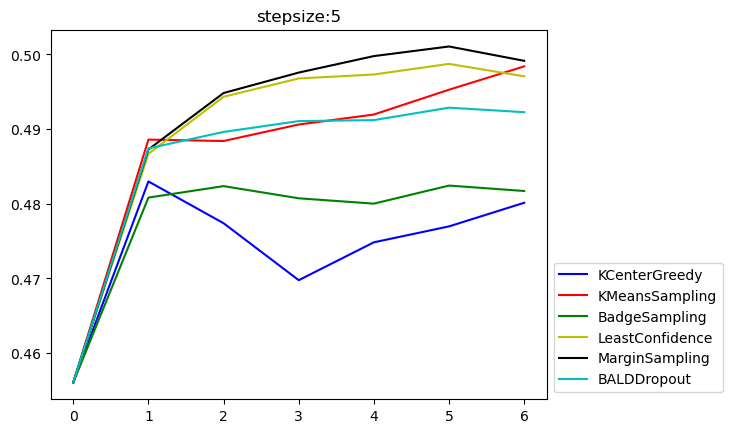

In [23]:
for s in steplist:
    print(s)
    dots = {
        "A549": 'D-',
        "MCF7": 'o-',
        "PC3": 'x-',
    }
    clrs = {
        'KCenterGreedy': 'b', 
        'KMeansSampling': 'r', 
        'BadgeSampling': 'g',
        'LeastConfidence': 'y',
        'MarginSampling': 'k',
        'BALDDropout': 'c'
    }
    rds = int(30/s + 1)
    for q in ctgr:
        print(q)

        mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/LINCS_{q}_{s}_0_30.pkl'
        with open(mtcPath, 'rb') as f:
            all_acc,all_f1 = pickle.load(f)
        all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
        print(all_f1.shape)
        all_f1 = np.mean(all_f1, axis=0)
        print(all_f1.shape)
        f1 = np.mean(all_f1, axis=1)
        print(f1.shape)
        plt.plot(np.arange(0, rds, 1), f1, f'{clrs[q]}',label=f'{q}')
    plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
    plt.title(f'stepsize:{s}')
    plt.show()

5


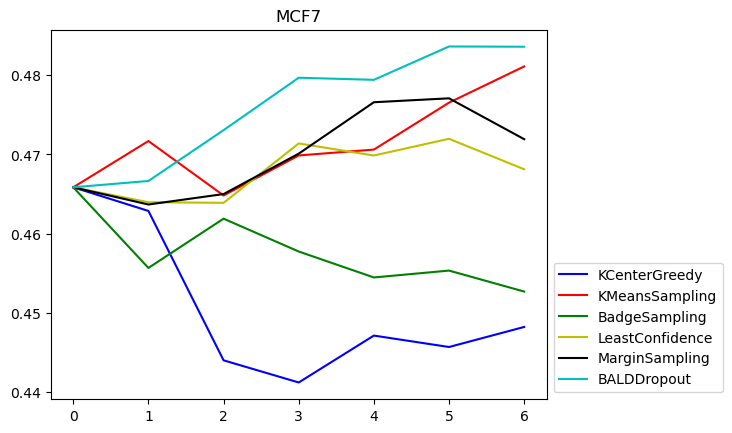

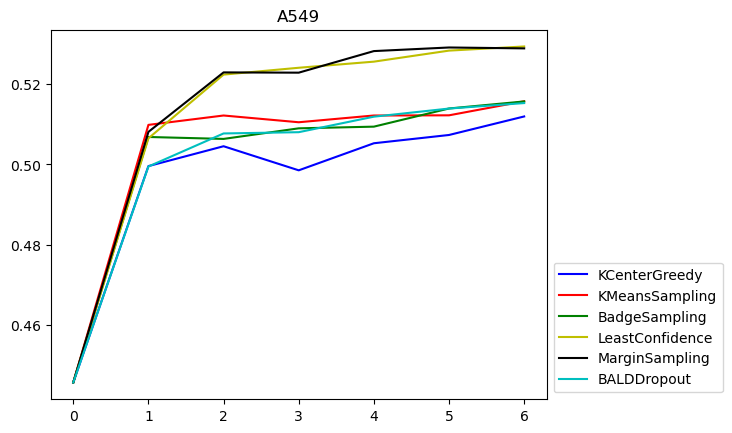

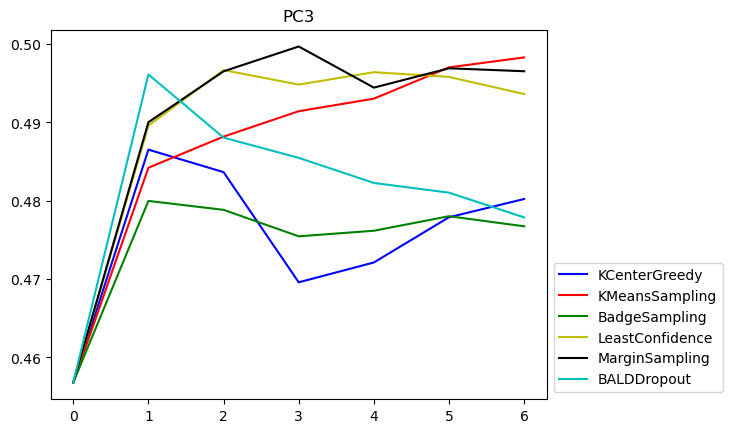

In [25]:
for s in steplist:
    print(s)
    dots = {
        "A549": 'D-',
        "MCF7": 'o-',
        "PC3": 'x-',
    }
    clrs = {
        'KCenterGreedy': 'b', 
        'KMeansSampling': 'r', 
        'BadgeSampling': 'g',
        'LeastConfidence': 'y',
        'MarginSampling': 'k',
        'BALDDropout': 'c'
    }
    rds = int(30/s + 1)
    for i in range(len(celllist)):
        for q in ctgr:
            # print(q)
            mtcPath = f'/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning/results/LINCS_{q}_{s}_0_30.pkl'
            with open(mtcPath, 'rb') as f:
                all_acc,all_f1 = pickle.load(f)
            all_acc, all_f1 = np.array(all_acc), np.array(all_f1)
            # print(all_f1.shape)
            all_f1 = np.mean(all_f1, axis=0)
            # print(all_f1.shape)
            f1 = all_f1[:,i]
            # print(f1.shape)
            plt.plot(np.arange(0, rds, 1), f1, f'{clrs[q]}',label=f'{q}')
        plt.legend(bbox_to_anchor=(1., 0.), loc="lower left")
        plt.title(celllist[i])
        plt.show()